In [1]:
import cv2
from matplotlib import pyplot as plt

# Testing filters on images

In [2]:
def show_ten_img_test(img_arr, indices, classname, filter_type, title_top):
    f, axarr = plt.subplots(2,5, figsize = (20, 10))
    pos = 'Original_positive'
    neg = 'Original_negative'
    f.suptitle(title_top)
    for i in range(0, 5):
        # Plot original
        org_path = indices[i]
        img_org = cv2.imread(org_path)
        axarr[0,i].imshow(img_org)
        titel = 'original' + classname
        axarr[0,i].set_title(titel)

        # Plot with filter
        if filter_type=='Clahe':
            axarr[1,i].imshow(img_arr[i], cmap='gray')
        else:
            axarr[1,i].imshow(img_arr[i])
        axarr[1,i].set_title(filter_type)

    plt.show()

In [3]:
#Useful images to test the filters on
images_neg = ['Images/test/Negative/00822.jpg', 'Images/test/Negative/00283.jpg', 'Images/test/Negative/03627.jpg', 'Images/test/Negative/05784.jpg', 'Images/test/Negative/07195.jpg']
images_pos = ['Images/test/Positive/05359.jpg', 'Images/test/Positive/01728.jpg', 'Images/test/Positive/00215.jpg', 'Images/test/Positive/03230.jpg', 'Images/test/Positive/02444.jpg']

## Bilateral filter

In [4]:
def bilat(image_path, parameter_dict):
    img = cv2.imread(image_path)
    image = cv2.bilateralFilter(img, parameter_dict['d'], parameter_dict['sigmaColor'], parameter_dict['sigmaSpace'])
    return image

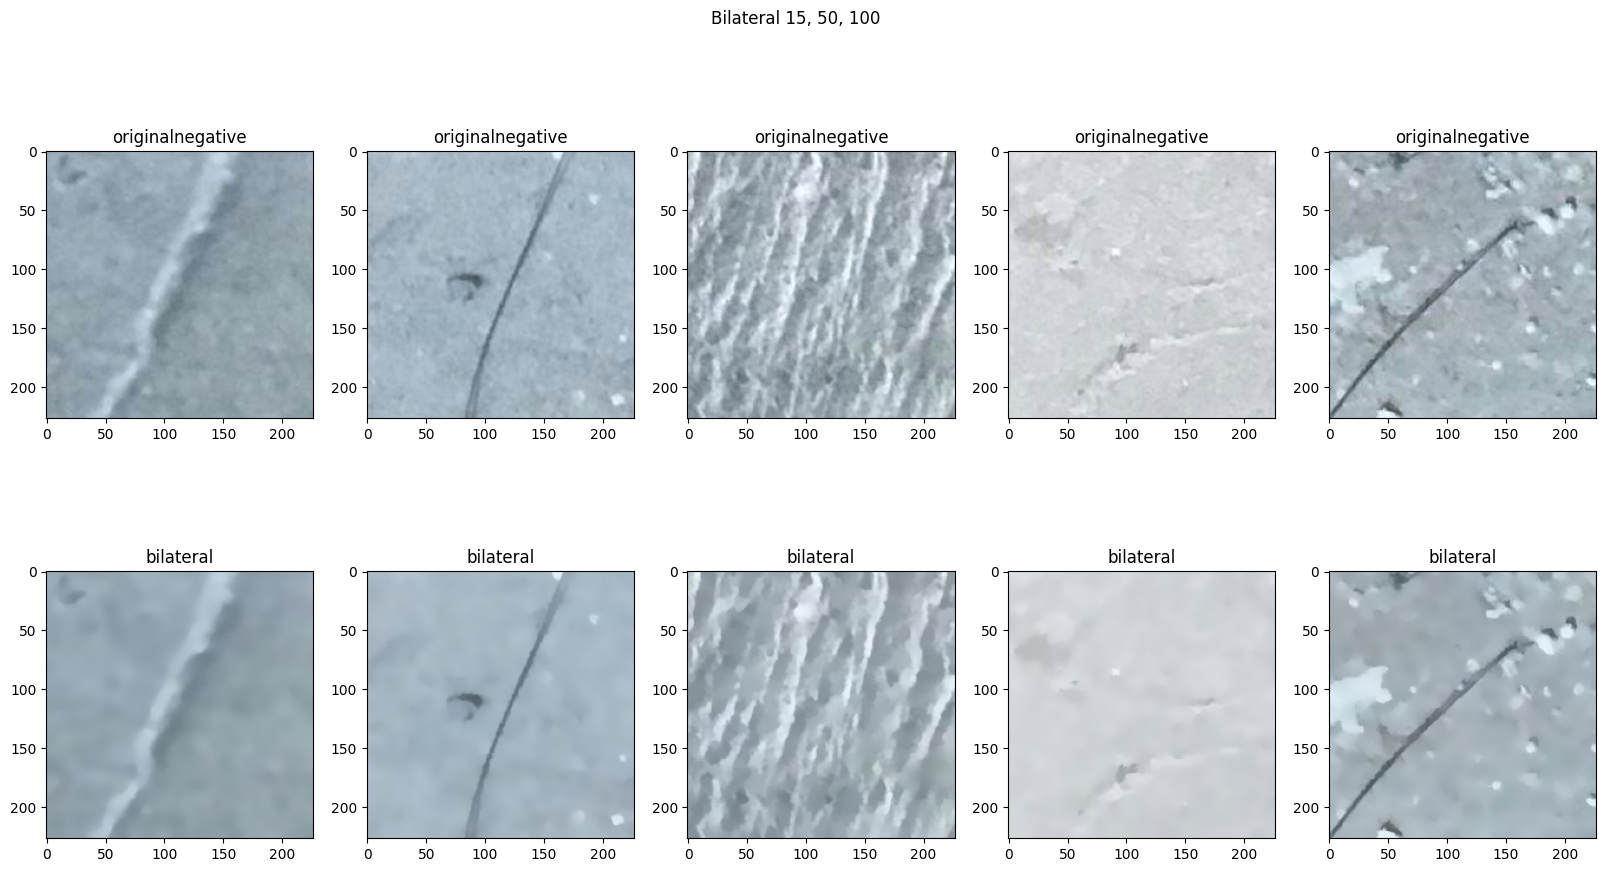

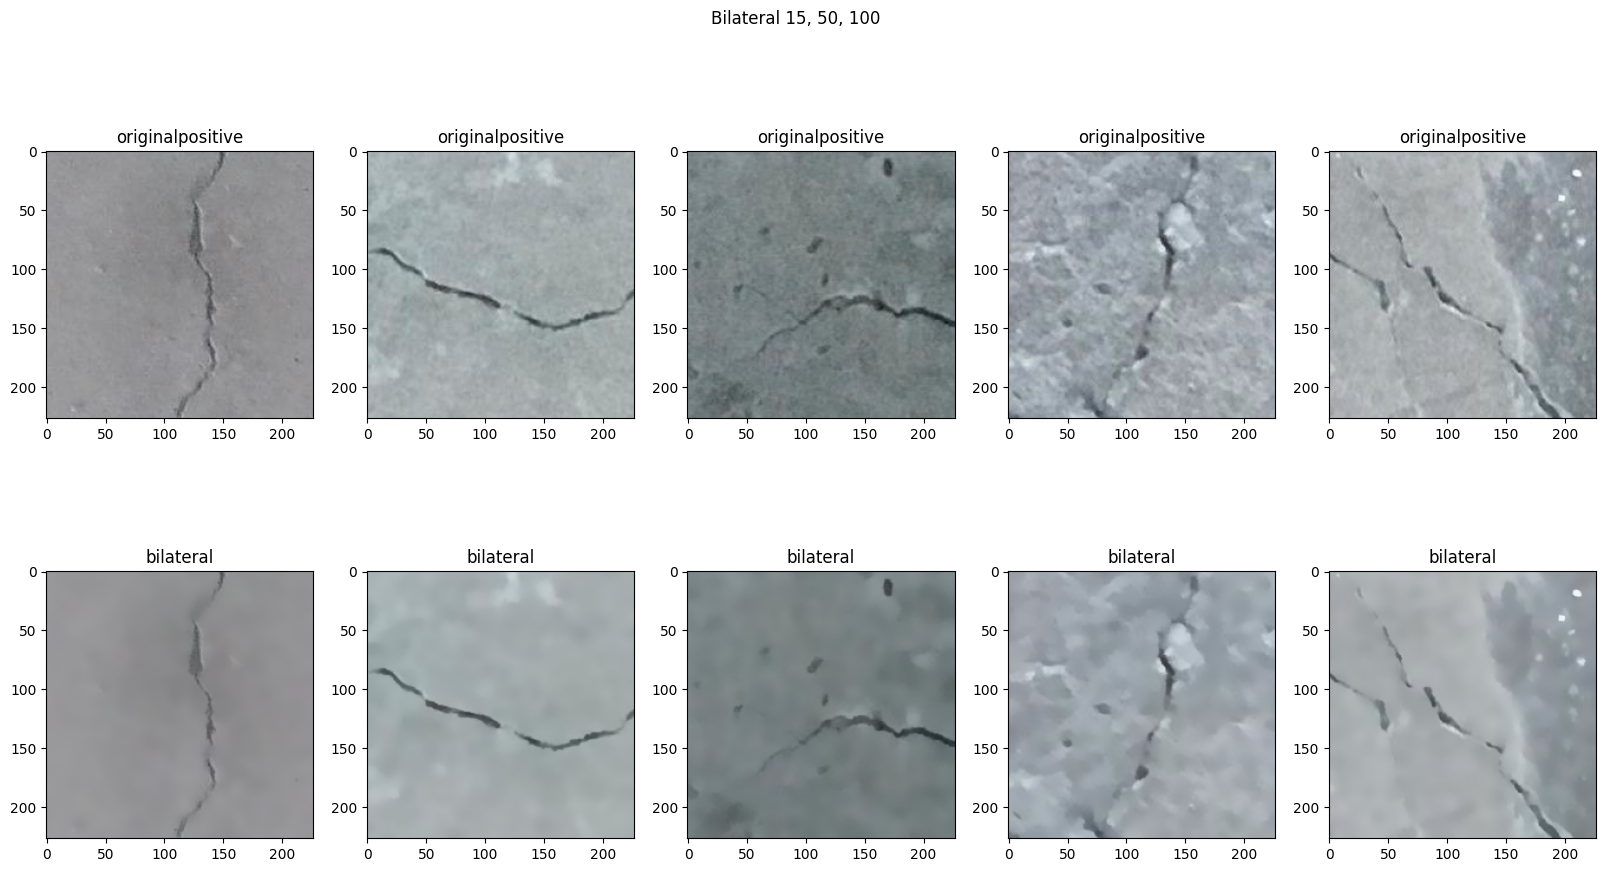

In [5]:
parameter_dict = {'gray_scale': False, 'd': 15, 'sigmaColor': 50, 'sigmaSpace': 100}

neg = []
pos = []
for i in range(5):
    neg.append(bilat(images_neg[i], parameter_dict))
    pos.append(bilat(images_pos[i], parameter_dict))

title = f'Bilateral {parameter_dict["d"]}, {parameter_dict["sigmaColor"]}, {parameter_dict["sigmaSpace"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'bilateral', title)
show_ten_img_test(pos, images_pos, 'positive', 'bilateral', title)

## Canny-edge detection

In [6]:
def canny(image_path, parameter_dict):
    img = cv2.imread(image_path)
    edge = cv2.Canny(img, parameter_dict['low_tresh'], parameter_dict['high_tresh'])
    return edge

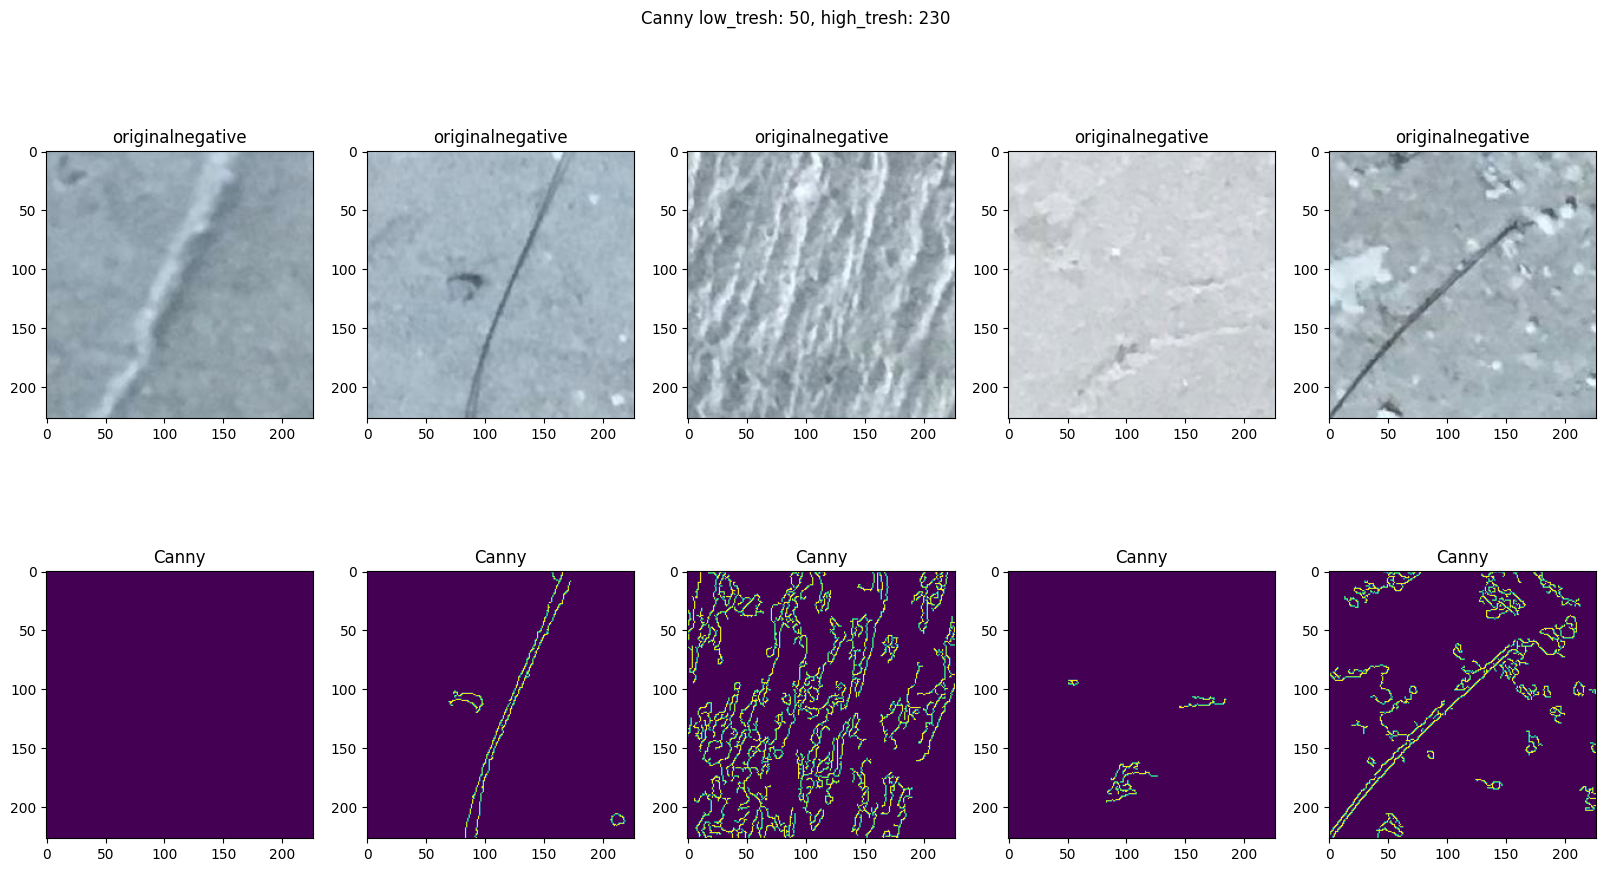

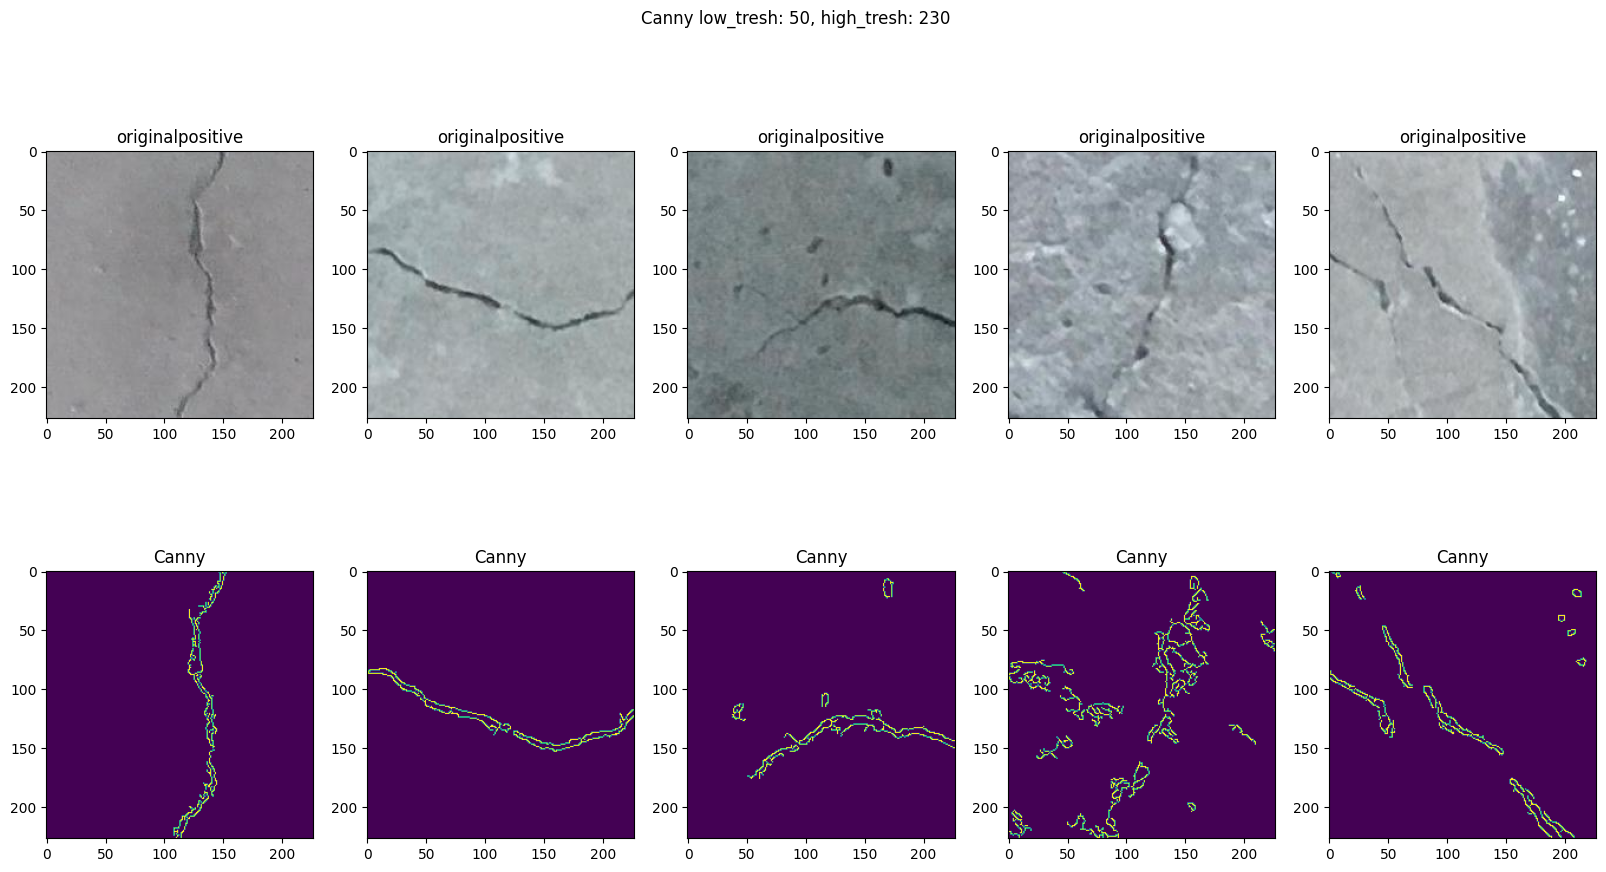

In [7]:
parameter_dict = {'gray_scale': False, 'low_tresh': 50, 'high_tresh': 230}

neg = []
pos = []
for i in range(5):
    neg.append(canny(images_neg[i], parameter_dict))
    pos.append(canny(images_pos[i], parameter_dict))

title = f'Canny low_tresh: {parameter_dict["low_tresh"]}, high_tresh: {parameter_dict["high_tresh"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'Canny', title)
show_ten_img_test(pos, images_pos, 'positive', 'Canny', title)

## CLAHE filter

In [8]:
def clahe(image_path, parameter_dict):
    img = cv2.imread(image_path, 0)
    clahe = cv2.createCLAHE(clipLimit=parameter_dict['clipLimit'], tileGridSize=parameter_dict['tileGridSize'])
    enhanced = clahe.apply(img)
    return enhanced

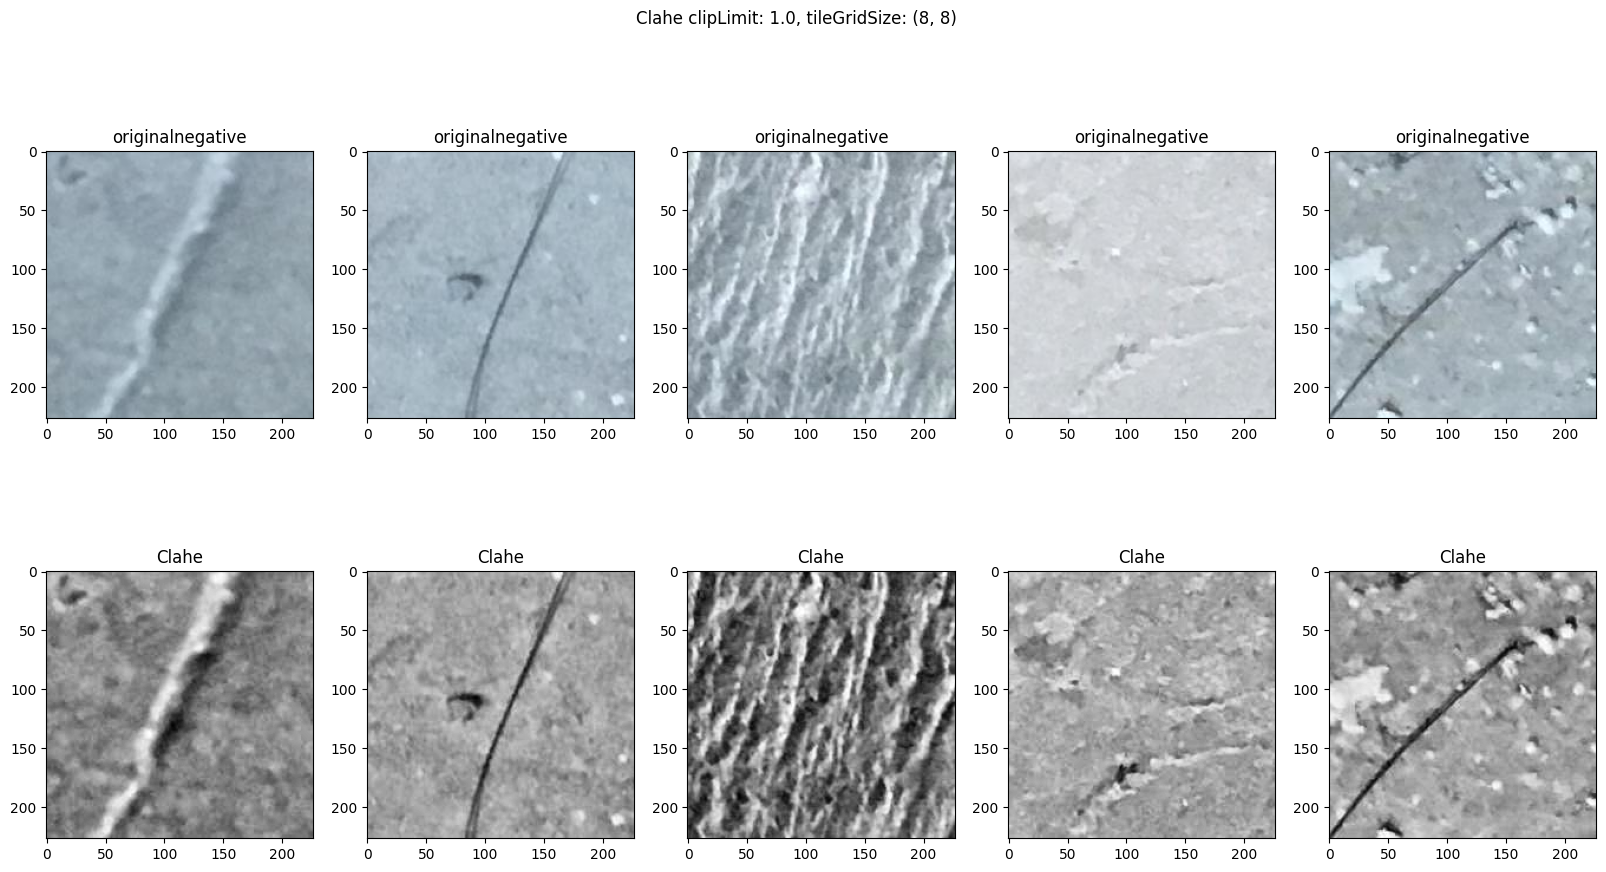

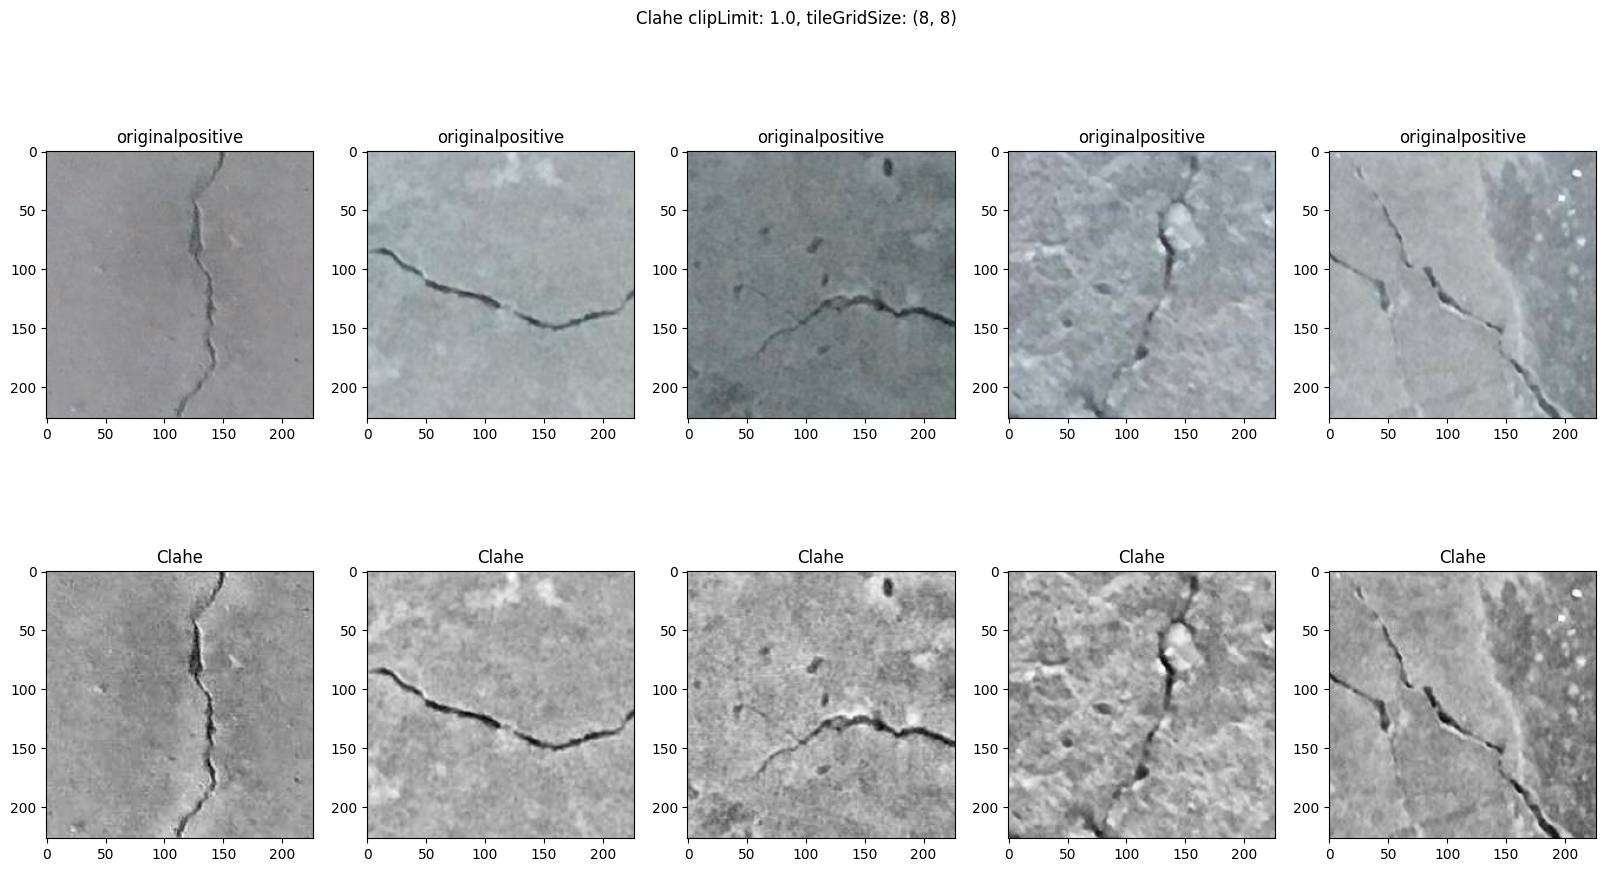

In [9]:
parameter_dict = {'gray_scale': False, 'clipLimit': 1.0, 'tileGridSize': (8,8)}

neg = []
pos = []
for i in range(5):
    neg.append(clahe(images_neg[i], parameter_dict))
    pos.append(clahe(images_pos[i], parameter_dict))

title = f'Clahe clipLimit: {parameter_dict["clipLimit"]}, tileGridSize: {parameter_dict["tileGridSize"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'Clahe', title)
show_ten_img_test(pos, images_pos, 'positive', 'Clahe', title)